In [1]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('Final_text_2.csv')

# Overview of the data
df.info()
df.head()  # Display the first few rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313060 entries, 0 to 313059
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   category            313060 non-null  object
 1   sub_category        313060 non-null  object
 2   crimeaditionalinfo  309847 non-null  object
dtypes: object(3)
memory usage: 7.2+ MB


,category,sub_category,crimeaditionalinfo
0,Women/Child Related Crime,Rape/Gang Rape-Sexually Abusive Content,respected sr serious matter want inform prsn r...
1,Women/Child Related Crime,Rape/Gang Rape-Sexually Abusive Content,respected sr serious matter want inform prsn r...
2,Women/Child Related Crime,Rape/Gang Rape-Sexually Abusive Content,respected sr serious matter want inform prsn r...
3,Women/Child Related Crime,Rape/Gang Rape-Sexually Abusive Content,respected sr serious matter want inform prsn r...
4,Women/Child Related Crime,Rape/Gang Rape-Sexually Abusive Content,respected sr serious matter want inform prsn r...


In [2]:
# Check for missing values
df.isnull().sum()


category                 0
sub_category             0
crimeaditionalinfo    3213
dtype: int64

In [3]:
import pandas as pd

# Assuming your DataFrame is named `df`
df.dropna(subset=['crimeaditionalinfo'], inplace=True)


In [4]:
# Check for missing values
df.isnull().sum()

category              0
sub_category          0
crimeaditionalinfo    0
dtype: int64

C:\Users\amit\AppData\Local\Temp\ipykernel_16216\4210864095.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.values, y=category_counts.index, palette="viridis")


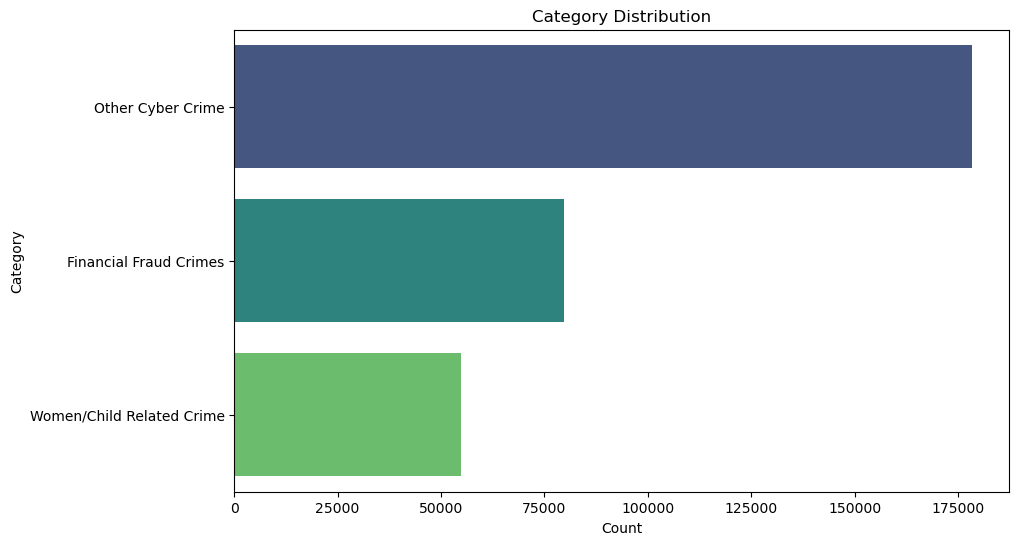

C:\Users\amit\AppData\Local\Temp\ipykernel_16216\4210864095.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_subcategories.values, y=top_20_subcategories.index, palette="magma")


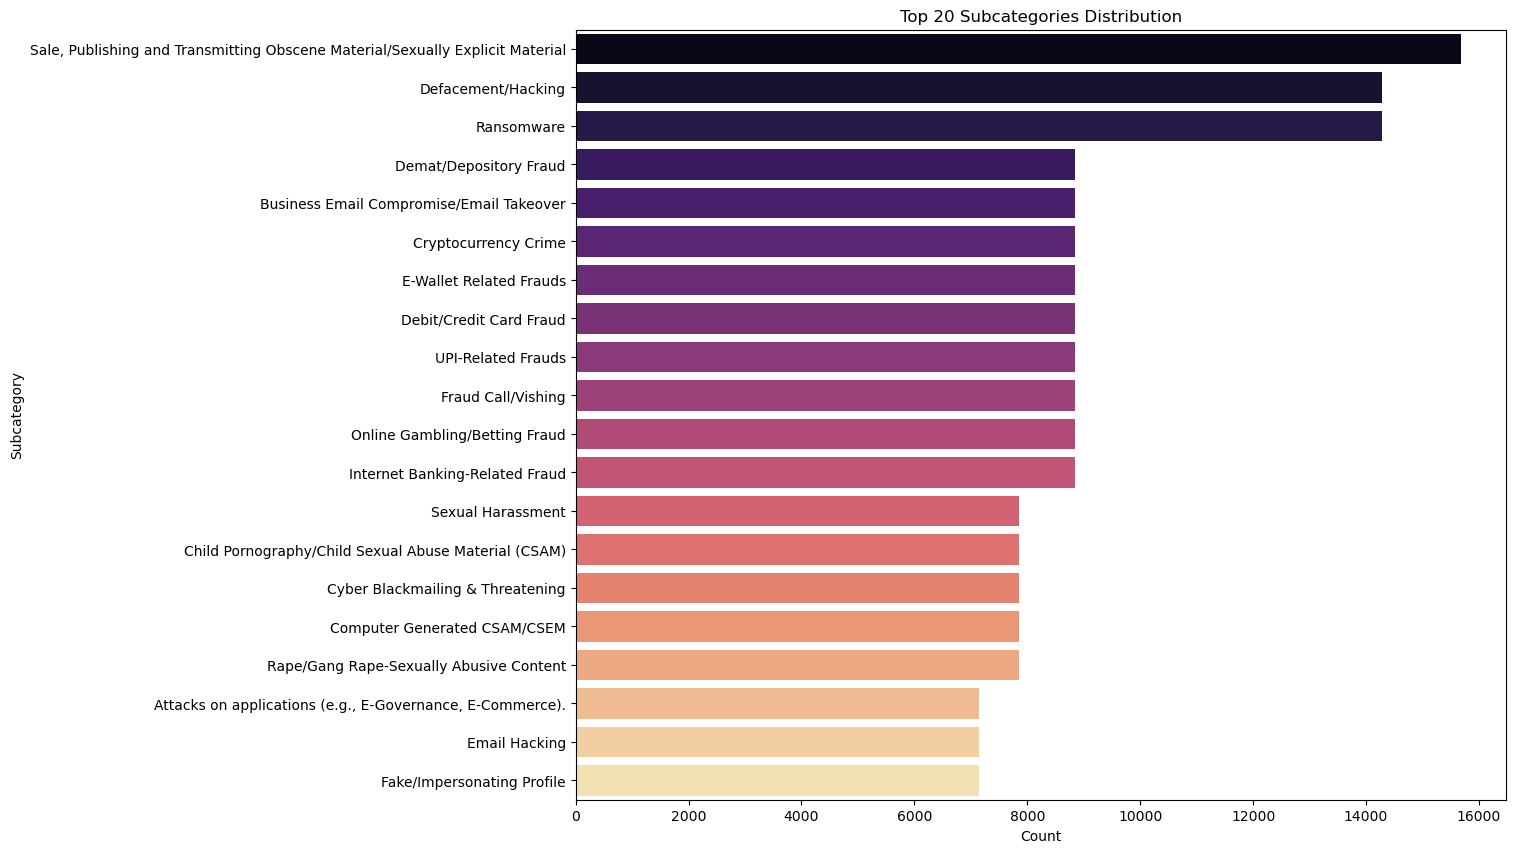

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data for categories and subcategories
category_counts = pd.Series({
    'Other Cyber Crime': 178475,
    'Financial Fraud Crimes': 79677,
    'Women/Child Related Crime': 54908
})

subcategory_counts = pd.Series({
    'Sale, Publishing and Transmitting Obscene Material/Sexually Explicit Material': 15688,
    'Ransomware': 14278,
    'Defacement/Hacking': 14278,
    'Demat/Depository Fraud': 8853,
    'Business Email Compromise/Email Takeover': 8853,
    'Cryptocurrency Crime': 8853,
    'E-Wallet Related Frauds': 8853,
    'Debit/Credit Card Fraud': 8853,
    'UPI-Related Frauds': 8853,
    'Fraud Call/Vishing': 8853,
    'Online Gambling/Betting Fraud': 8853,
    'Internet Banking-Related Fraud': 8853,
    'Rape/Gang Rape-Sexually Abusive Content': 7844,
    'Cyber Blackmailing & Threatening': 7844,
    'Computer Generated CSAM/CSEM': 7844,
    'Sexual Harassment': 7844,
    'Child Pornography/Child Sexual Abuse Material (CSAM)': 7844,
    'Denial of Service (DoS) and Distributed Denial of Service (DDoS) attacks.': 7139,
    'Cyber Terrorism': 7139,
    'Impersonating Email': 7139,
    'Email Phishing': 7139,
    'Tampering with Computer Source Documents': 7139,
    'Online Cyber Trafficking': 7139,
    'Online Matrimonial Fraud': 7139,
    'Damage to Computer Systems': 7139,
    'Provocative Speech of Unlawful Acts': 7139,
    'Unauthorized Access/Data Breach': 7139,
    'Attacks on applications (e.g., E-Governance, E-Commerce).': 7139,
    'Profile Hacking/Identity Theft': 7139,
    'Malware attacks.': 7139,
    'Cheating by Impersonation': 7139,
    'Online Job Fraud': 7139,
    'Cyber Bullying/Stalking/Sexting': 7139,
    'Data breaches.': 7139,
    'Any Other Cyber Crime': 7139,
    'Fake/Impersonating Profile': 7139,
    'Email Hacking': 7139,
    'Intimidating Email': 7139
})

# Plot for Category distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.values, y=category_counts.index, palette="viridis")
plt.title('Category Distribution')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

# Plot for Subcategory distribution (Top 20 for better visibility)
plt.figure(figsize=(12, 10))
top_20_subcategories = subcategory_counts.sort_values(ascending=False).head(20)
sns.barplot(x=top_20_subcategories.values, y=top_20_subcategories.index, palette="magma")
plt.title('Top 20 Subcategories Distribution')
plt.xlabel('Count')
plt.ylabel('Subcategory')
plt.show()


In [8]:
data =df

count    309847.000000
mean        336.379323
std         218.065578
min           1.000000
25%         161.000000
50%         291.000000
75%         466.000000
max        1499.000000
Name: text_length, dtype: float64


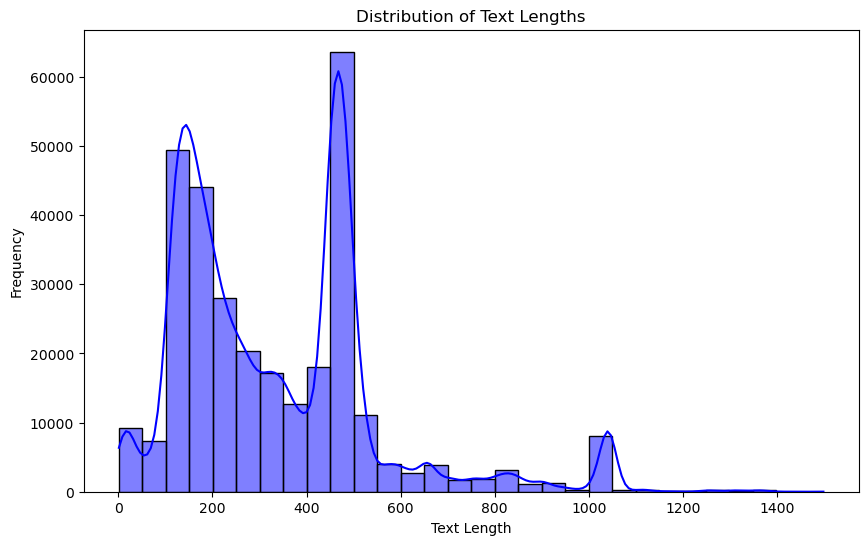

In [9]:
# Add a new column for text length
data['text_length'] = data['crimeaditionalinfo'].apply(len)

# Display basic statistics on text length
print(data['text_length'].describe())

# Plot the distribution of text length
plt.figure(figsize=(10, 6))
sns.histplot(data['text_length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

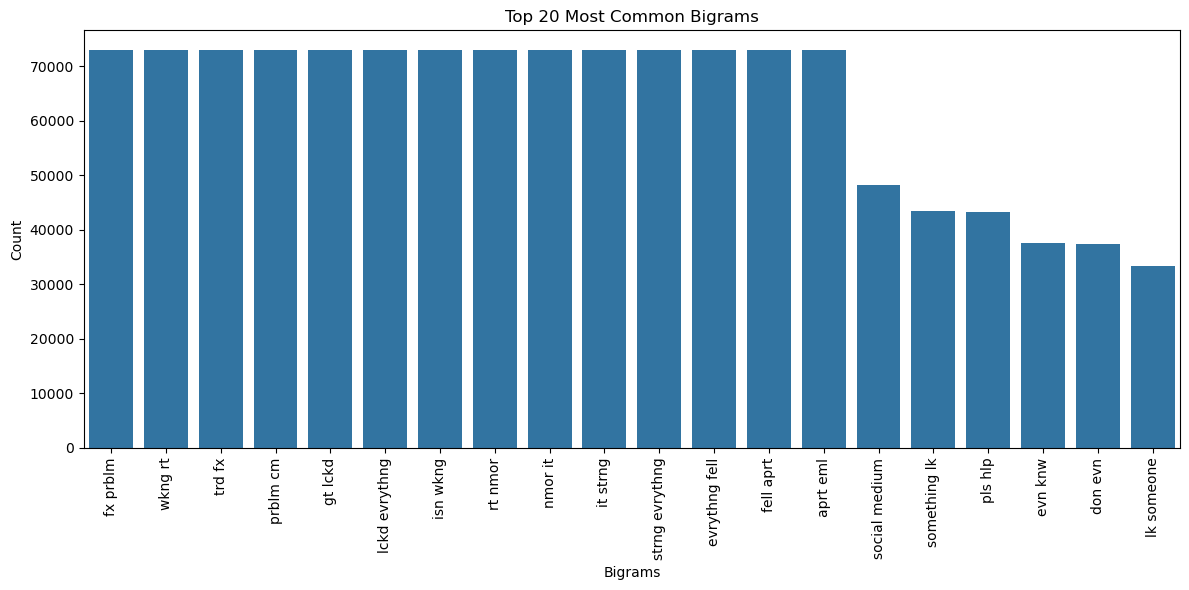

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_bigram(corpus, n=10):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

top_bigrams = get_top_n_bigram(df['crimeaditionalinfo'], 20)
words, counts = zip(*top_bigrams)

plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(counts))
plt.title('Top 20 Most Common Bigrams')
plt.xlabel('Bigrams')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [12]:
!pip install wordcloud

  Using cached wordcloud-1.9.3-cp312-cp312-win_amd64.whl.metadata (3.5 kB)
Using cached wordcloud-1.9.3-cp312-cp312-win_amd64.whl (301 kB)


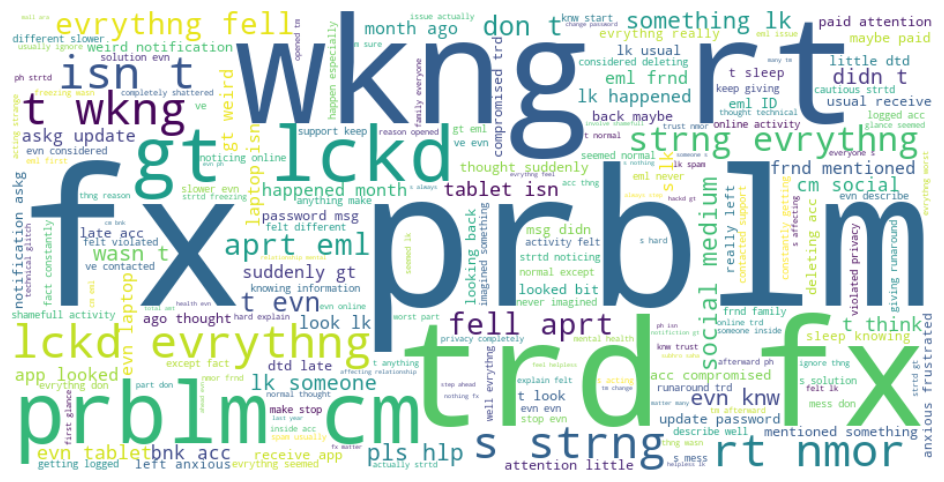

In [13]:
from wordcloud import WordCloud

# Combine all text into a single string
text = ' '.join(df['crimeaditionalinfo'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
wordcloud.to_file('wordcloud.png')